In [31]:
import lyricsgenius
from bs4 import BeautifulSoup
from urllib import request
import nltk
import requests
import pandas as pd
from typing import List
import re
#from scrape_and_clean import get_lyrics_from_genius, clean_lyrics, is_english, create_genre_df


In [32]:
genius = lyricsgenius.Genius("RTZe0y0EcpL4i9vPPglZVr43Py6K6P3LVZMO6cbSBEpP7cKZXY6SoiErdQpFD-H8")

In [170]:
genius.verbose = False # Turn off status messages
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

In [33]:
artist = genius.search_artist("Eminem", max_songs=3, sort="title")

Searching for songs by Eminem...

Song 1: "10, 9, 8"
Song 2: "12 Days of Diss-Mas"
Song 3: "1-833-2GET-REV (REVIVAL Voicemail)"

Reached user-specified song limit (3).
Done. Found 3 songs.


In [39]:
pinball_wizard = genius.search_song("Pinball Wizard", "The Who")
print(pinball_wizard.lyrics)

Searching for "Pinball Wizard" by The Who...
Done.
49 ContributorsPinball Wizard Lyrics[Verse 1: Roger Daltrey]
Ever since I was a young boy, I've played the silver ball
From Soho down to Brighton, I must've played 'em all
But I ain't seen nothing like him in any amusement hall
That deaf, dumb, and blind kid sure plays a mean pinball

[Verse 2: Roger Daltrey]
He stands like a statue, becomes part of the machine
Feeling all the bumpers, always playing clean
Plays by intuition, the digit counters fall
That deaf, dumb, and blind kid sure plays a mean pinball

[Chorus 1: Pete Townshend & Roger Daltrey]
He's a pinball wizard, there has to be a twist
A pinball wizard's got such a supple wrist

[Post-Chorus: Pete Townshend & Roger Daltrey]
How do you think he does it? I don't know!
What makes him so good?

[Verse 3: Roger Daltrey]
Ain't got no distractions, can't hear no buzzes and bells
Don't see, no lights a-flashing, plays by sense of smell
Always gets the replay, never seen him fall
That 

In [190]:
reservoir_dogs = genius.search_song("God Only Knows - Mono / 1997 Remastered", 
                                    "The Beach Boys")
print(reservoir_dogs.lyrics)

Searching for "God Only Knows - Mono / 1997 Remastered" by The Beach Boys...
Done.
3 ContributorsReservoir Dogs LyricsQuentin Tarantino's

R E S E R V O I R   D O G S








October 22, 1990

-----------------


This movie is dedicated to these following sources of

inspiration:


TIMOTHY CAREY

ROGER CORMAN

ANDRE DeTOTH
CHOW YUEN FAT

JEAN LUC GODDARD

JEAN PIERRE MELVILLE

LAWRENCE TIERNEY

LIONEL WHITE

---------------------

RESERVOIR DOGS

1      INT. UNCLE BOB'S PANCAKE HOUSE - MORNING

Eight men dressed in BLACK SUITS, sit around a table at a
breakfast cafe.  They are MR. WHITE, MR. PINK, MR. BLUE,
MR. BLONDE, MR. ORANGE, MR. BROWN, NICE GUY EDDIE CABOT,
and the big boss, JOE CABOT.  Most are finished eating and
are enjoying coffee and conversation.  Joe flips through a
small address book.  Mr. Pink is telling a long and
involved story about Madonna.

MR. PINK
"Like a Virgin" is all about a
girl who digs a guy with a big
dick.  The whole song is a
metaphor for big dicks.
MR. B

In [42]:
paint_it_black = genius.search_song("Let It Be", 
                                    "The Beatles")
print(paint_it_black.lyrics)


Searching for "Let It Be" by The Beatles...
Done.
143 ContributorsTranslationsEspañolDeutschLet It Be Lyrics[Verse 1]
When I find myself in times of trouble
Mother Mary comes to me
Speaking words of wisdom
Let it be
And in my hour of darkness
She is standing right in front of me
Speaking words of wisdom
Let it be

[Chorus]
Let it be, let it be
Let it be, let it be
Whisper words of wisdom
Let it be

[Verse 2]
And when the broken-hearted people
Living in the world agree
There will be an answer
Let it be
For though they may be parted
There is still a chance that they will see
There will be an answer
Let it be
You might also like[Chorus]
Let it be, let it be
Let it be, let it be
Yeah, there will be an answer
Let it be
Let it be, let it be
Let it be, let it be
Whisper words of wisdom
Let it be
[Instrumental Break]

[Guitar Solo]

[Chorus]
Let it be, let it be
Let it be, yeah, let it be
Whisper words of wisdom
Let it be

[Verse 3]
And when the night is cloudy
There is still a light that shin

In [174]:
album = genius.search_album("The Magnolia Electric Co.", "Songs: Ohia")
album_text = album.to_text()
album_text
#album

'38 ContributorsFarewell Transmission Lyrics[Verse 1]\nThe whole place is dark\nEvery light on this side of the town\nSuddenly it all went down\nNow we\'ll all be brothers of\nThe fossil fire of the sun\nNow we will all be sisters of\nThe fossil blood of the moon\n\n[Verse 2]\nSomeone must have set \'em up\nNow they\'ll be working in the cold grey rock\nNow they\'ll be working in the hot mill steam...\nNow they\'ll be working in the concrete\nIn the sirens and the silences now\nAll the great set up hearts\nAll at once start to beat\n\n[Verse 3]\nAfter tonight if you don\'t want this to be\nA secret out of the past\nI will resurrect it, I\'ll have a good go at it\nI\'ll streak his blood across my beak\nDust my feathers with his ash\nI can feel his ghost breathing down my back\nYou might also like[Chorus]\nI will try and know whatever I try\nI will be gone but not forever\nI will try and know whatever I try\nI will be gone but not forever\n\n[Verse 4]\nReal truth about it is\nNo one gets

In [35]:
spotifydf = pd.read_csv('/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/dataset.csv')

In [177]:
#find all unique values for track_genre
spotifydf['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [37]:
def get_genre_by_track_and_artist(track_name, artist_name):
    # Filter the DataFrame for the track and artist (case insensitive)
    track_row = spotifydf[
        (spotifydf['track_name'].str.lower() == track_name.lower()) & 
        (spotifydf['artists'].str.lower().str.contains(artist_name.lower()))
    ]

    # Check if the song is in the dataset and retrieve the genre
    if not track_row.empty:
        genre = track_row['track_genre'].iloc[0]
        return genre
    else:
        return "Genre not found"

# Example usage
track_to_search = "without me"
artist_to_search = "eminem"  # Replace with the correct artist name
genre = get_genre_by_track_and_artist(track_to_search, artist_to_search)
print(f"The genre of '{track_to_search}' by {artist_to_search} is: {genre}")

The genre of 'without me' by eminem is: hip-hop


In [196]:
def get_lyrics_from_genius(row):
    try:
        song = genius.search_song(row['track_name'], row['artists'])
        return song.lyrics if song else "Lyrics not found"
    except Exception as e:
        print(f"Error occurred while fetching lyrics: {e}")
        return "Lyrics not found"

def clean_lyrics(lyrics):
    lyrics = re.sub(r'\[.*?\]', '', lyrics)  # Removes any remaining bracketed sections
    # Remove trailing 'Embed' and any numbers directly before it
    lyrics = re.sub(r'\d*Embed$', '', lyrics, flags=re.MULTILINE)
    return lyrics.strip()  # Remove any leading/trailing whitespace

def is_english(lyrics):
    # Simple heuristic: If the number of ASCII characters is below a certain threshold, consider it non-English
    threshold = 0.9  # 90% of the characters should be ASCII characters
    num_ascii_chars = sum(1 for char in lyrics if ord(char) < 128)
    return (num_ascii_chars / len(lyrics)) > threshold

def create_genre_df(genres: List[str], sample: int, spotifydf: pd.DataFrame):
    frames = []
    for genre in genres:
        genre_df = spotifydf[spotifydf['track_genre'] == genre].copy()
        lyrics_df = pd.DataFrame(columns=spotifydf.columns)  # Ensure we have the same columns
        
        while len(lyrics_df) < sample and not genre_df.empty:
            sample_df = genre_df.sample(n=1)
            sample_df['Lyrics'] = sample_df.apply(get_lyrics_from_genius, axis=1)
            sample_df['Lyrics'] = sample_df['Lyrics'].apply(clean_lyrics)
            
            song_title = sample_df['track_name'].iloc[0].lower()
            if song_title in sample_df['Lyrics'].iloc[0].lower():
                lyrics = sample_df['Lyrics'].iloc[0]
                lyrics_start_index = lyrics.lower().find("lyrics")
                if lyrics_start_index != -1:
                    sample_df['Lyrics'] = lyrics[lyrics_start_index + len("lyrics"):].strip()
                
                # Only append if lyrics were found and the song is in English
                if sample_df['Lyrics'].iloc[0] != "Lyrics not found" and is_english(sample_df['Lyrics'].iloc[0]):
                    lyrics_df = pd.concat([lyrics_df, sample_df])
                
            # Remove sampled row from genre_df to avoid resampling
            genre_df = genre_df.drop(sample_df.index)
        
        frames.append(lyrics_df)
        
    return pd.concat(frames, ignore_index=True)

In [203]:
songs_df = create_genre_df(['rock', 'pop', 'hip-hop', 'country'], 100, spotifydf)

Searching for "Rotting in Vain" by Korn...
Done.
Searching for "Christmas Without You" by OneRepublic...


/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_5575/3065767666.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lyrics_df = pd.concat([lyrics_df, sample_df])


Done.
Searching for "Vía Láctea" by Juanes...
Done.
Searching for "Stressed Out" by Twenty One Pilots...
Done.
Searching for "Summer Of '69" by Bryan Adams...
Done.
Searching for "Diez Mil Maneras" by David Bisbal...
Done.
Searching for "Life On Mars? - Live At A Bowie Celebration 2021" by YUNGBLUD...
Done.
Searching for "Paint It, Black" by The Rolling Stones...
Done.
Searching for "A Thousand Years" by Christina Perri...
Done.
Searching for "Don't Stop Me Now - Remastered 2011" by Queen...
Done.
Searching for "Christmas Time" by Bryan Adams...
Done.
Searching for "Infinity" by Jaymes Young...
Done.
Searching for "Apologize" by OneRepublic...
Done.
Searching for "Square Hammer" by Ghost...
Done.
Searching for "Yule Shoot Your Eye Out" by Fall Out Boy...
Done.
Searching for "Infinity" by Jaymes Young...
Done.
Searching for "Love Under Pressure" by James Blunt...
Done.
Searching for "Joe And Mary" by Bryan Adams...
Done.
Searching for "Sorry Sack Of Bones" by Volbeat...
Done.
Searching 

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_5575/3065767666.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lyrics_df = pd.concat([lyrics_df, sample_df])


Done.
Searching for "Angel Baby" by Troye Sivan...
Done.
Searching for "Normal" by Feid...
Done.
Searching for "Crazy What Love Can Do" by David Guetta;Becky Hill;Ella Henderson...
Done.
Searching for "Crazy What Love Can Do" by David Guetta;Becky Hill;Ella Henderson...
Done.
Searching for "Boss Bitch" by Doja Cat...
Done.
Searching for "Homesick" by Dua Lipa...
Done.
Searching for "Falak Tak" by Vishal-Shekhar;Udit Narayan;Mahalakshmi Iyer;Kausar Munir...
No results found for: 'Falak Tak Vishal-Shekhar;Udit Narayan;Mahalakshmi Iyer;Kausar Munir'
Searching for "Najaa (From "Sooryavanshi")" by Tanishk Bagchi;Pav Dharia;Nikhita Gandhi...
No results found for: 'Najaa (From "Sooryavanshi") Tanishk Bagchi;Pav Dharia;Nikhita Gandhi'
Searching for "Kadhale Kadhale" by Shankar Mahadevan;Padmalatha...
No results found for: 'Kadhale Kadhale Shankar Mahadevan;Padmalatha'
Searching for "Gustakhiyan" by The Landers...
No results found for: 'Gustakhiyan The Landers'
Searching for "Adipoli (From "Thi

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_5575/3065767666.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lyrics_df = pd.concat([lyrics_df, sample_df])


No results found for: 'Fate AP Dhillon;Gurinder Gill;Money Musik;Shinda Kahlon'
Searching for "Kaise Mujhe" by Benny Dayal;Shreya Ghoshal...
Done.
Searching for "Chandigarh Mein" by Badshah;Harrdy Sandhu;Lisa Mishra;Asees Kaur...
Done.
Searching for "Ball If I Want To" by DaBaby...
Done.
Searching for "Clout" by Offset;Cardi B...
Done.
Searching for "Udaarian" by Satinder Sartaaj...
Done.
Searching for "Chaiyya Chaiyya" by Sukhwinder Singh;Sapna Awasthi...
Done.
Searching for "Pind Hood Damn Good (RMG Intro)" by Sidhu Moose Wala...
Done.
Searching for "Pobre Diabla" by Don Omar...
Done.
Searching for "Suit Suit" by Guru Randhawa;Arjun...
Done.
Searching for "Bambiha Bole" by Amrit Maan;Sidhu Moose Wala...
Done.
Searching for "Built Different" by Sidhu Moose Wala...
Done.
Searching for "Bomba" by Don Omar...
Done.
Searching for "Chithiyaan" by Karan Aujla...
Done.
Searching for "Churchill Downs" by Jack Harlow;Drake...
Done.
Searching for "Special" by Lizzo...
Done.
Searching for "New F

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_5575/3065767666.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lyrics_df = pd.concat([lyrics_df, sample_df])


Done.
Searching for "The First Noel" by Gabby Barrett...
Done.
Searching for "Sing Me Back Home" by Don Williams...
Done.
Searching for "Styrofoam" by Ashley McBryde...
Done.
Searching for "Run Run Rudolph" by Luke Bryan...
Done.
Searching for "Cuddle Up, Cozy Down Christmas" by Dolly Parton;Michael Bublé...
Done.
Searching for "Love Will Keep Us Alive" by Eagles...
Done.
Searching for "Fall in Love" by Bailey Zimmerman...
Done.
Searching for "Jingle Bell Rock" by Blake Shelton...
Done.
Searching for "Drink In My Hand" by Eric Church...
Done.
Searching for "Jolene" by Dolly Parton...
Done.
Searching for "The Apple" by RaeLynn...
Done.
Searching for "You" by Dan + Shay...
Done.
Searching for "A Little Less Talk And A Lot More Action" by Toby Keith...
Done.
Searching for "Heartland - Pure Country/Soundtrack Version" by George Strait...
No results found for: 'Heartland - Pure Country/Soundtrack Version George Strait'
Searching for "City Bitch" by Mini Thin...
Done.
Searching for "Cuddle U

In [204]:
songs_df.shape

(400, 22)

In [205]:
songs_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Lyrics
0,91547,0nI0q4NuoOIskGNRizI6vs,Korn,Metal Lives!,Rotting in Vain,0,213000,True,0.498,0.946,...,1,0.0602,0.000121,0.000025,0.3590,0.310,106.276,4,rock,I wouldn't be angry if you'd just fucking cry\...
1,91091,6jWSUiDx2PiV8kgugdz29D,OneRepublic,Best Christmas Music 2022,Christmas Without You,0,197146,False,0.262,0.677,...,1,0.0528,0.447000,0.000000,0.2050,0.365,207.478,3,rock,"It's almost midnight, where you lay your head\..."
2,91418,6VDdsnE5y6OYV9UTyvv8p6,Juanes,Halloween 2022 Pop Vol. 1,Vía Láctea,0,213186,False,0.671,0.575,...,1,0.0575,0.004600,0.000217,0.1230,0.647,160.976,4,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...
3,91108,3CRDbSIZ4r5MsZ0YwxuEkn,Twenty One Pilots,Blurryface,Stressed Out,85,202333,False,0.734,0.637,...,0,0.1410,0.046200,0.000023,0.0602,0.648,169.977,4,rock,I wish I found some better sounds no one's eve...
4,91268,0GONea6G2XdnHWjNZd6zt3,Bryan Adams,Reckless (30th Anniversary / Deluxe Edition),Summer Of '69,82,216053,False,0.508,0.834,...,1,0.0386,0.018300,0.000000,0.0732,0.774,139.131,4,rock,I got my first real six-string\nBought it at t...


In [206]:
print(songs_df["track_name"].iloc[4])
print(songs_df["Lyrics"].iloc[4])

Summer Of '69
I got my first real six-string
Bought it at the five and dime
Played it 'til my fingers bled
Was the summer of '69


Me and some guys from school
Had a band and we tried real hard
Jimmy quit and Jody got married
I should've known we'd never get far


Oh, when I look back now
That summer seemed to last forever
And if I had the choice
Yeah, I'd always wanna be there
Those were the best days of my life


Ain't no use in complainin'
When you got a job to do
I spent my evenings down at the drive-in
And that's when I met you, yeah


Standin' on your mama's porch
You told me that you'd wait forever
Oh, and when you held my hand
I knew that it was now or never
Those were the best days of my life
Oh, yeah
Back in the summer of '69, oh
See Bryan Adams LiveGet tickets as low as $59You might also like
Man, we were killin' time
We were young and restless
We needed to unwind
I guess nothing can last forever
Forever, no
Yeah


And now the times are changin'
Look at everything that's com

In [207]:
#print the columns of the dataframe
print(songs_df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'Lyrics'],
      dtype='object')


In [209]:
# List of columns to keep
columns_to_keep = ['artists', 'track_name', 'track_genre', 'Lyrics']

# Use list comprehension to create a list of columns to drop
columns_to_drop = [col for col in songs_df.columns if col not in columns_to_keep]

# Drop the columns
songs_df_new = songs_df.drop(columns=columns_to_drop)

In [210]:
songs_df_new.head()

,artists,track_name,track_genre,Lyrics
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\..."
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...


In [6]:
#download to csv
songs_df_new.to_csv('songs_lyrics.csv', index=False)

NameError: name 'songs_df_new' is not defined

In [13]:
df = pd.read_csv('songs_lyrics.csv')

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jordanbruce/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text, theme_light


In [16]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(lyrics):
    return sia.polarity_scores(lyrics)['compound']

df['Sentiment'] = df['Lyrics'].apply(get_sentiment)

In [18]:
# Define a function to calculate average words per line
def average_words_per_line(lyrics):
    lines = lyrics.split('\n')  # Split the lyrics into lines
    if len(lines) == 0:
        return 0
    word_counts = [len(line.split()) for line in lines if line.strip() != '']  # List of word counts per line
    return sum(word_counts) / len(word_counts)  # Return average

# Apply the function to create a new column for average words per line
df['Avg_Words_Per_Line'] = df['Lyrics'].apply(average_words_per_line)

In [19]:
df

,artists,track_name,track_genre,Lyrics,Sentiment,Avg_Words_Per_Line
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...,-0.9823,6.137931
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\...",-0.9862,9.214286
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...,-0.8834,5.516129
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...,0.9980,11.583333
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...,0.9856,6.239130
...,...,...,...,...,...,...
395,Gabby Barrett;Charlie Puth,I Hope (feat. Charlie Puth),country,10-110. Miley Cyrus – Midnight Sky\n9. Kylie M...,0.9711,6.512821
396,Bailey Zimmerman,Where It Ends,country,This is where it ends\nI been down a few broke...,-0.0880,8.731707
397,Morgan Wallen,Wasted On You,country,"I don't always wake up in the mornin', pour my...",-0.9966,7.861111
398,Kenny Chesney,Everyone She Knows,country,Everyone she knows is getting married\nAll the...,0.3365,5.903846


In [22]:
agg_df = df.groupby('track_genre').agg({
    'Sentiment': 'mean',
    'Avg_Words_Per_Line': 'mean'
}).reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/2773416366.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


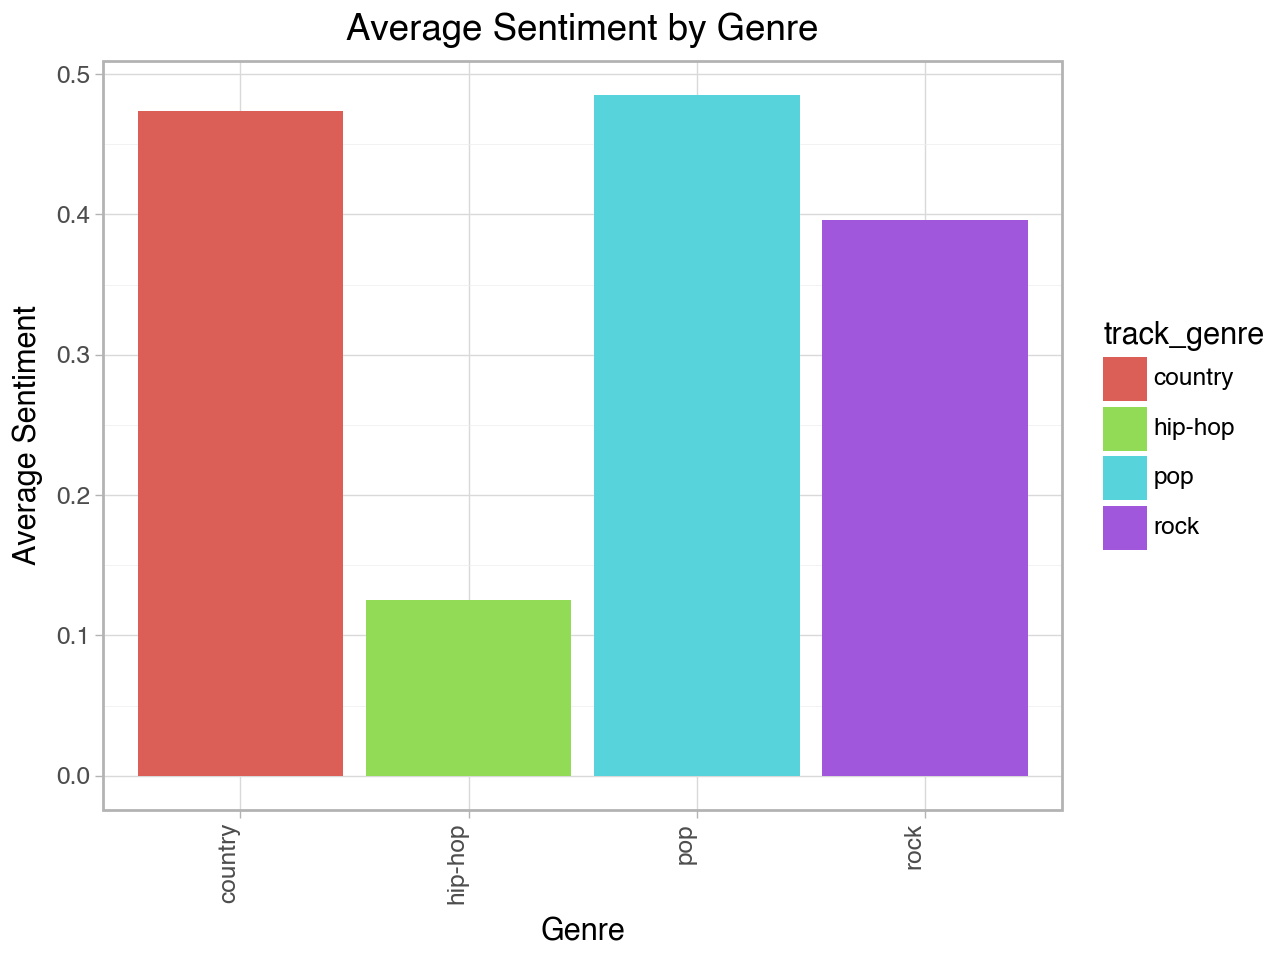

In [29]:
sentiment_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Sentiment', fill='track_genre')) +
    geom_bar(stat='identity') +  # Use identity to tell ggplot these are pre-summarized counts
    labs(title='Average Sentiment by Genre', x='Genre', y='Average Sentiment') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(sentiment_plot)


/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/1128661466.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


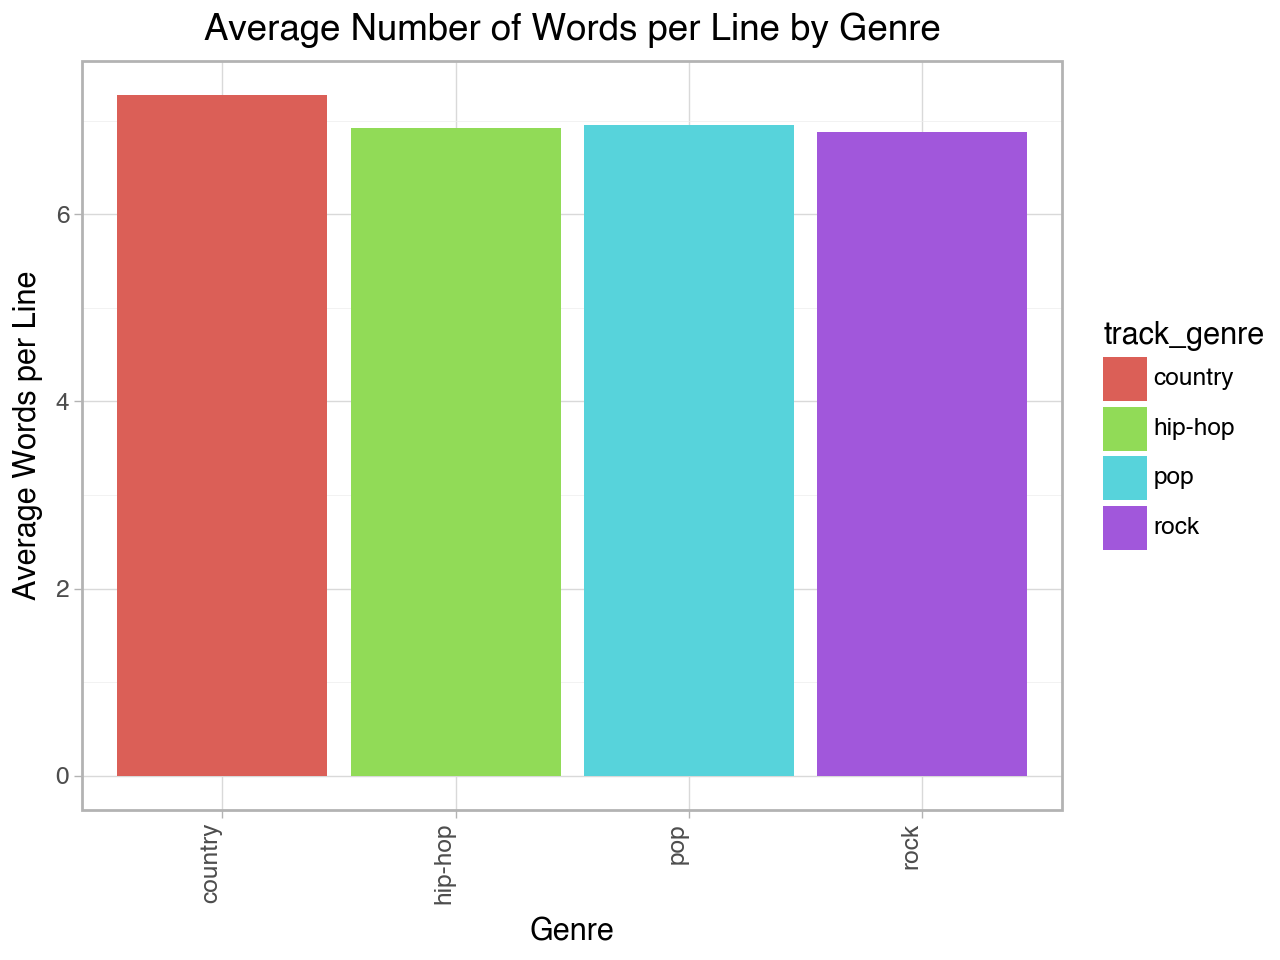

In [30]:
# Bar chart for average words per line by genre
line_length_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Avg_Words_Per_Line', fill='track_genre')) +
    geom_bar(stat='identity') +
    labs(title='Average Number of Words per Line by Genre', x='Genre', y='Average Words per Line') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(line_length_plot)

In [44]:
#print the lyrics of the first song
print(df['Lyrics'].iloc[4])

I got my first real six-string
Bought it at the five and dime
Played it 'til my fingers bled
Was the summer of '69


Me and some guys from school
Had a band and we tried real hard
Jimmy quit and Jody got married
I should've known we'd never get far


Oh, when I look back now
That summer seemed to last forever
And if I had the choice
Yeah, I'd always wanna be there
Those were the best days of my life


Ain't no use in complainin'
When you got a job to do
I spent my evenings down at the drive-in
And that's when I met you, yeah


Standin' on your mama's porch
You told me that you'd wait forever
Oh, and when you held my hand
I knew that it was now or never
Those were the best days of my life
Oh, yeah
Back in the summer of '69, oh
See Bryan Adams LiveGet tickets as low as $59You might also like
Man, we were killin' time
We were young and restless
We needed to unwind
I guess nothing can last forever
Forever, no
Yeah


And now the times are changin'
Look at everything that's come and gone
Som

In [46]:
def uniqueness(lyrics):
    # Split the lyrics into lines
    lines = lyrics.splitlines()
    
    # Remove empty lines
    lines = [line.strip() for line in lines if line.strip() != '']
    
    # Calculate the percentage of unique lines
    unique_lines = set(lines)  # Using a set to store unique lines
    if len(lines) > 0:
        unique_percentage = len(unique_lines) / len(lines)
    else:
        unique_percentage = 0  # Avoid division by zero if all lines are empty
    
    return unique_percentage

In [47]:
df['Unique_Line_Percentage'] = df['Lyrics'].apply(uniqueness)

In [48]:
df.head()

,artists,track_name,track_genre,Lyrics,Sentiment,Avg_Words_Per_Line,Unique_Line_Percentage
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...,-0.9823,6.137931,0.551724
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\...",-0.9862,9.214286,0.750000
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...,-0.8834,5.516129,0.741935
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...,0.9980,11.583333,0.645833
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...,0.9856,6.239130,0.869565


In [49]:
genre_uniqueness = df.groupby('track_genre')['Unique_Line_Percentage'].mean().reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/2118134218.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


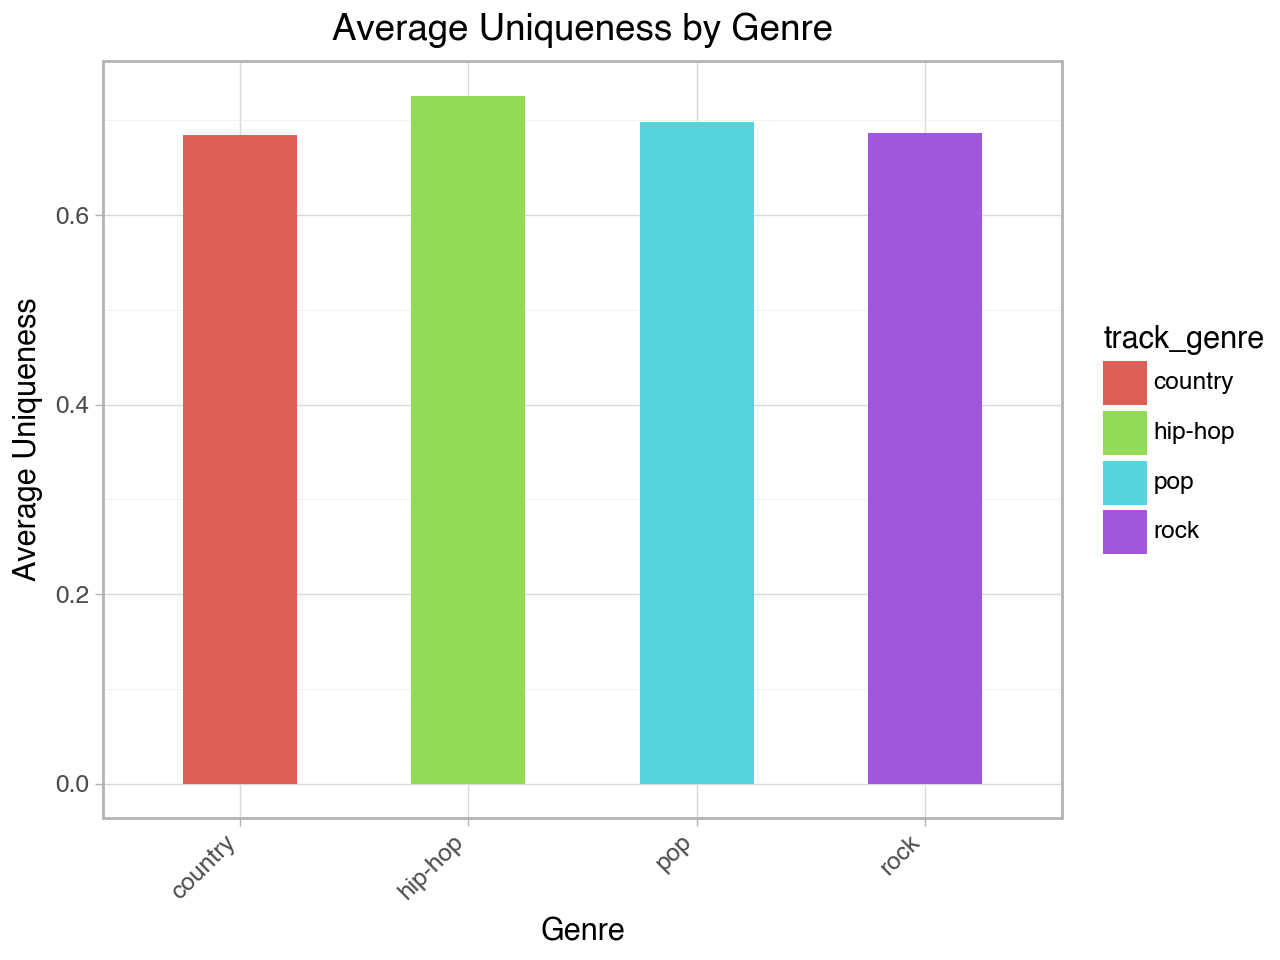

In [50]:
# Create a bar chart for average uniqueness per genre
uniqueness_plot = (
    ggplot(genre_uniqueness, aes(x='track_genre', y='Unique_Line_Percentage', fill='track_genre')) +
    geom_bar(stat='identity', width=0.5) +  # Use identity to use the y values as heights directly
    labs(title='Average Uniqueness by Genre', x='Genre', y='Average Uniqueness') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Improve label readability
)
print(uniqueness_plot)

In [ ]:
def line_tokenize(text):
    # Split the text into lines using splitlines(), which handles various newline characters
    lines = text.splitlines()

    # Filter out empty lines if you just want non-empty lines
    lines = [line for line in lines if line.strip() != '']
    
    return lines